In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model

In [2]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [3]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [4]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [5]:
max(X)


13.778363109799741

In [6]:
min(X)

7.047691954679576

In [7]:
max(y)

25.228858797424788

In [8]:
min(y)

21.57339618758479

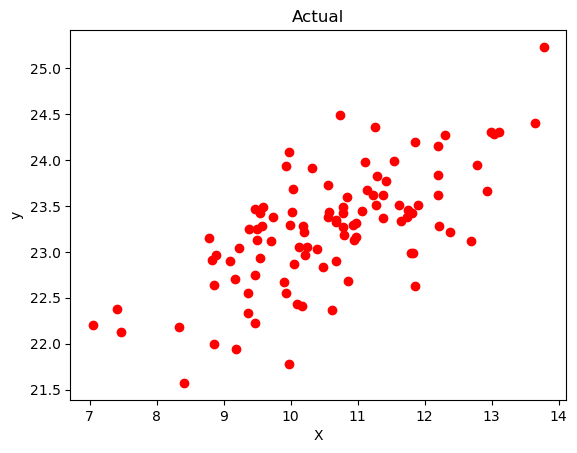

In [9]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
def loss_function(m1,m2,m3, b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m1*(x**3)+m2*(x**2)+m3*x+b))**2
    return total_error/ float(len(points))    
    
    

In [11]:
def gradient_descent(m1_now,m2_now,m3_now,b_now,points,L):
    m1_gradient =0
    m2_gradient =0
    m3_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m1_gradient += -(2/n)*(x**3)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        m2_gradient += -(2/n)*(x**2)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        m3_gradient += -(2/n)*(x)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        
        b_gradient += -(2/n)* (yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        
    m1 = m1_now - m1_gradient *L
    m2 = m2_now - m2_gradient *L
    m3 = m3_now - m3_gradient *L
    b = b_now - b_gradient *L
    return m1,m2,m3,b
    

In [12]:
m1 =0
m2 =0
m3 =0
b =0

L=0.000000520 #try 0.008 and 0.009
epochs =50000

In [13]:
for i in range(epochs):
    if i% 500 == 0:
        print(f"Epoch: {i}")
        print(m1,m2,m3,b)
    m1,m2,m3,b = gradient_descent(m1,m2,m3,b,df,L)
    
#print(m,b)

Epoch: 0
0 0 0 0
Epoch: 500
0.012005982825319157 0.05096695607211579 0.009384770862772292 0.0013254803052226533
Epoch: 1000
0.00798051480680387 0.09598823781752933 0.01781187826395423 0.0025235313628945277
Epoch: 1500
0.004320812098689808 0.1369176559904805 0.025485342043530014 0.0036162965562812083
Epoch: 2000
0.0009936496663903373 0.17412690335197972 0.03247362066942214 0.004613339657688725
Epoch: 2500
-0.0020311794614265967 0.2079539091988913 0.038838954046085644 0.005523355694813299
Epoch: 3000
-0.004781138344721854 0.2387059063365264 0.04463792839030523 0.0063542498649160565
Epoch: 3500
-0.007281195380827461 0.26666221945657465 0.04992198979535649 0.007113209280669008
Epoch: 4000
-0.009554050912175078 0.2920768002270845 0.05473791114452669 0.0078067681988218856
Epoch: 4500
-0.011620343249652386 0.31518053210240843 0.05912821661160116 0.00844086732369102
Epoch: 5000
-0.013498835981411664 0.33618332577108184 0.06313156760098951 0.009020907723695805
Epoch: 5500
-0.015206588267103353 

Epoch: 44000
-0.03221137518290971 0.5445762813172115 0.11203774771806246 0.017471376758339204
Epoch: 44500
-0.03221125046569717 0.5445627608024632 0.11217006066654678 0.017510588103572505
Epoch: 45000
-0.03221103351062561 0.5445482086928508 0.11230218048036641 0.017549771986846235
Epoch: 45500
-0.03221073269871588 0.5445327187479324 0.1124341244282544 0.017588930820645
Epoch: 46000
-0.032210355649682464 0.544516376210433 0.11256590821030983 0.017628066798312286
Epoch: 46500
-0.03220990929108693 0.544499258579874 0.11269754610048804 0.017667181913956772
Epoch: 47000
-0.032209399921212085 0.5444814363159537 0.11282905107614712 0.01770627798055008
Epoch: 47500
-0.0322088332662235 0.5444629734780205 0.11296043493582651 0.017745356646380845
Epoch: 48000
-0.032208214532138665 0.5444439283064589 0.11309170840632829 0.017784419410013963
Epoch: 48500
-0.032207548452075664 0.5444243537512673 0.11322288124007036 0.017823467633891064
Epoch: 49000
-0.0322068393292106 0.5444042979526267 0.1133539623

In [14]:

ypred =m1*(X**3)+m2*(X**2)+ m3*X + b

In [15]:
z=loss_function(m1,m2,m3, b, df)
z

1.790660560236011

In [16]:
df.iloc[0].StudyTime


12.936518045494863

In [17]:
z= (df.iloc[0].StudyTime **3)*m1+(df.iloc[0].StudyTime **2)*m2 +df.iloc[0].StudyTime *m3+  b

z

22.86519851356829

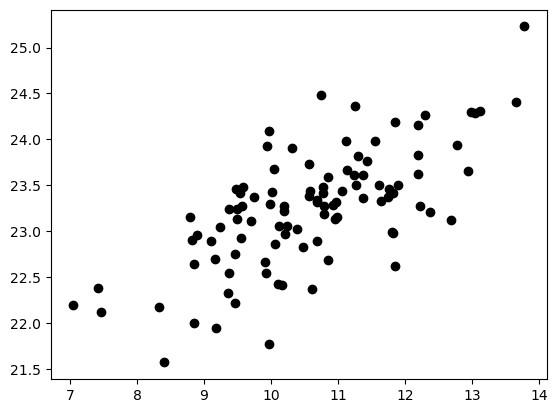

In [18]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()

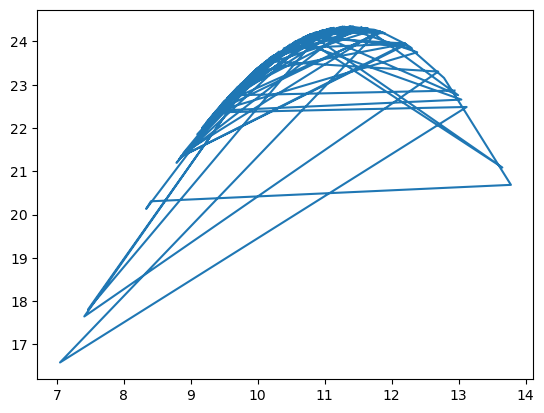

In [19]:
plt.plot(X, ypred)     # regression line
plt.show()

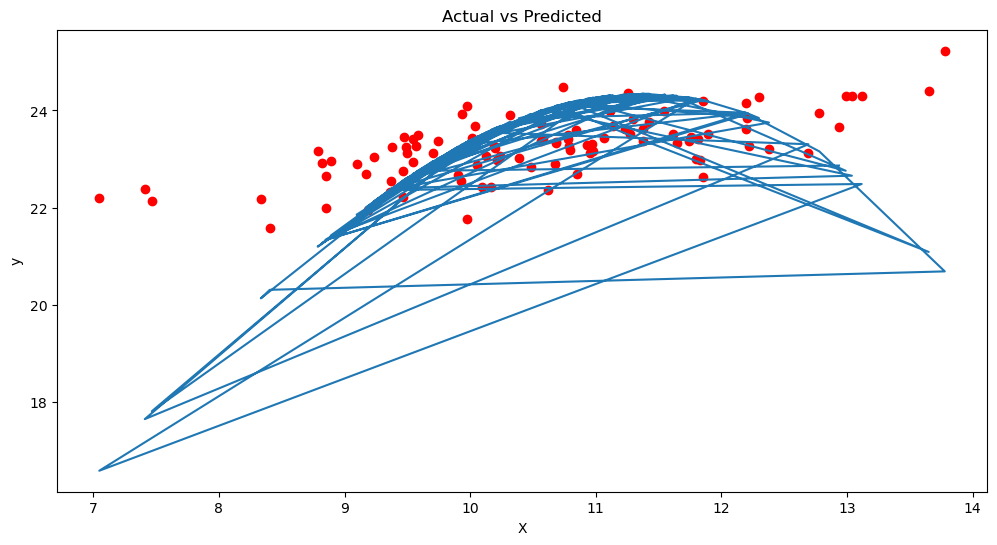

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.plot(X, ypred)     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [21]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':', (df.iloc[0].StudyTime **3)*m1+(df.iloc[0].StudyTime **2)*m2 +df.iloc[0].StudyTime *m3+  b
,':',ypred[i])

In [22]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 22.86519851356829 : 22.86519851356829
1 : 9.582365379524887 : 23.486963466260214 : 22.86519851356829 : 22.754529731849058
2 : 9.707742371604816 : 23.114068532376844 : 22.86519851356829 : 22.95844450404223
3 : 8.890547066765745 : 22.96395338164826 : 22.86519851356829 : 21.424009944812934
4 : 11.798111443987018 : 22.991977510325583 : 22.86519851356829 : 24.242277115979373
5 : 7.047691954679576 : 22.198998802933204 : 22.86519851356829 : 16.583410971004586
6 : 13.11721764632472 : 24.305443519445554 : 22.86519851356829 : 22.485799379398966
7 : 9.358189648657346 : 22.330606593693233 : 22.86519851356829 : 22.360286145636852
8 : 10.978558644085648 : 23.160458340223883 : 22.86519851356829 : 24.261569146565407
9 : 10.125944436783884 : 23.054090604381845 : 22.86519851356829 : 23.5470037099334
10 : 12.693161905567461 : 23.12138991154686 : 22.86519851356829 : 23.303554052559527
11 : 7.409788935753519 : 22.380516376747202 : 22.86519851356829 : 17.64581863